# z-score calculation

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
from scipy import stats

In [104]:
mean=5
std=0.7
x = 8

In [105]:
stats.norm.cdf(x,loc=mean,scale=std)

0.9999908923514255

In [106]:
1-stats.norm.cdf(x,loc=mean,scale=std)

9.10764857453561e-06

In [107]:
mean=711
std=29
x<=680

True

In [108]:
stats.norm.cdf(680,loc=711,scale=29)

0.14254260383881612

In [109]:
mean=711
std=29
x>697

False

In [110]:
# what is P(697<x>740) #area before 690

In [111]:
stats.norm.cdf(697,loc=711,scale=29)

0.31463356742704107

In [112]:
1-stats.norm.cdf(740,loc=711,scale=29) #area after 740

0.15865525393145707

In [113]:
1-(0.31463356742704107+0.15865525393145707)  #to find the area between 690 and 740

0.5267111786415019

# Prabability Distribution

In [114]:
"https://raw.githubusercontent.com/slmsshk/DataSet/main/BEML.csv" 
"https://raw.githubusercontent.com/slmsshk/DataSet/main/GLAXO.csv"         # datasets

'https://raw.githubusercontent.com/slmsshk/DataSet/main/GLAXO.csv'

In [115]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [116]:
beml_df=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/BEML.csv")

In [117]:
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [118]:
glaxo_df=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/GLAXO.csv")

In [119]:
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [120]:
beml_df=beml_df[["Date","Close"]]
glaxo_df=glaxo_df[["Date","Close"]]

In [121]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [122]:
'''The DataFrames have a date column, so we can
create a Datetime Index index from this column Date. It will ensure that the rows are sorted by time in 
ascending order.'''
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date'])).drop('Date', axis=1) 
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date'])).drop('Date',axis=1)

In [123]:
glaxo_df

,Close
Date,
2010-01-04,1625.65
2010-01-05,1616.80
2010-01-06,1638.50
2010-01-07,1648.70
2010-01-08,1639.80
...,...
2016-12-26,2723.50
2016-12-27,2701.75
2016-12-28,2702.15


Text(0, 0.5, 'Close Price')

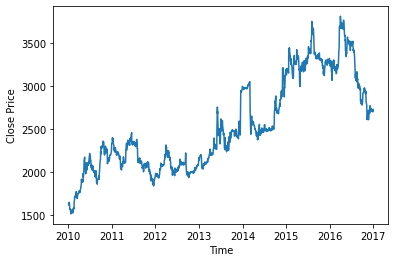

In [124]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close)
plt.xlabel("Time")
plt.ylabel("Close Price")

In [147]:
glaxo_df["gain"]=glaxo_df.Close.pct_change(periods=1)
beml_df["gain"]=beml_df.Close.pct_change(periods=1)

In [148]:
glaxo_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),gain
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74,NaN
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,-0.005444
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,0.013422
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,0.006225
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,-0.005398
...,...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15,-0.001283
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10,-0.007986
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44,0.000148
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87,0.009529


In [149]:
glaxo_df=glaxo_df.dropna()
beml_df=beml_df.dropna()

In [150]:
import seaborn as sn

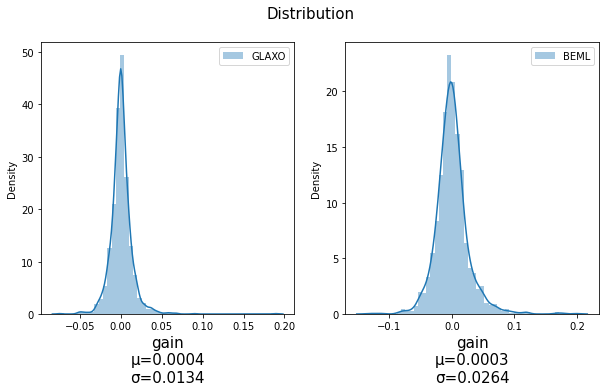

In [151]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle("Distribution",fontsize=15)

sn.distplot(glaxo_df.gain,label="GLAXO")
plt.xlabel(f'gain\nµ={round(glaxo_df.gain.mean(), 4)}\nσ={round(glaxo_df.gain.std(), 4)}',fontsize=15)
plt.ylabel("Density")
plt.legend()

plt.subplot(1,2,2)
sn.distplot(beml_df.gain,label="BEML")
plt.xlabel(f'gain\nµ={round(beml_df.gain.mean(), 4)}\nσ={round(beml_df.gain.std(), 4)}',fontsize=15)
plt.ylabel("Density")
plt.legend()

In [152]:
print("Mean:",round(glaxo_df.gain.mean(), 4))
print("Standard Deviation",round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation 0.0134


In [131]:
print("Mean:",round(beml_df.gain.mean(), 4))
print("Standard Deviation",round(beml_df.gain.std(), 4))

Mean: 0.0003
Standard Deviation 0.0264


In [132]:
from scipy import stats
stats.norm.cdf(-0.02,
  loc=glaxo_df.gain.mean(),
  scale=glaxo_df.gain.std())

0.06352488667177401

In [133]:
from scipy import stats
1-stats.norm.cdf(0.02,
  loc=glaxo_df.gain.mean(),
  scale=glaxo_df.gain.std())

0.07104511457618568

In [134]:
from scipy import stats
stats.norm.cdf(-0.02,
  loc=beml_df.gain.mean(),
  scale=beml_df.gain.std())

0.22155987503755292

In [135]:
from scipy import stats
1-stats.norm.cdf(0.02,
  loc=beml_df.gain.mean(),
  scale=beml_df.gain.std())

0.22769829484075355

In [136]:
beml_df.gain.mean()

0.0002707480790572326

# confidence interval

In [137]:
from scipy import stats
stats.norm.ppf(.975)

1.959963984540054

In [138]:
stats.norm.ppf(.95)

1.6448536269514722

In [139]:
from scipy import stats
import pandas as pd 
import numpy as np

In [140]:
glaxo_df=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/GLAXO.csv")

In [159]:
glaxo_df["gain"]=glaxo_df.Close.pct_change(periods=1)
beml_df["gain"]=beml_df.Close.pct_change(periods=1)

In [160]:
glaxo_df_ci = stats.norm.interval(0.95,
  loc = glaxo_df.gain.mean(),
  scale=glaxo_df.gain.std())
print( "Mean at 90% confidance interval is:",np.round(glaxo_df_ci, 4))

Mean at 90% confidance interval is: [-0.0258  0.0266]


In [161]:
beml_df=pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/BEML.csv")

In [163]:
beml_df["gain"]=beml_df.Close.pct_change(periods=1)

In [164]:
beml_df_ci = stats.norm.interval(0.95,loc=beml_df.gain.mean(),scale=beml_df.gain.std())
print( "mean at 90% confidance interval is: ",np.round(beml_df_ci, 4))

mean at 90% confidance interval is:  [-0.0515  0.0521]
